# Fashion MNIST Dataset

### Brief Context
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

### Data Description
* Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.
* Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.
* The training and test data sets have 785 columns.
* The first column consists of the class labels (see above), and represents the article of clothing.
* The rest of the columns contain the pixel-values of the associated image.

### The Fashion MNIST Dataset Includes:
* 60,000 training examples
* 10,000 testing examples
* 0 classes
* 28×28 grayscale/single channel images

### The Ten Fashion Class Labels Include:
* T-shirt/top
* Trouser/pants
* Pullover shirt
* Dress
* Coat
* Sandal
* Shirt
* Sneaker
* Bag
* Ankle boot

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [2]:
train_df = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv', sep = ',')

# Exploring the train and test data

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Spliting the train and test data into x and y arrays where x represents the image data and y represents the labels. To do that we need to convert the dataframes into numpy arrays of float32 type which is the acceptable form for tensorflow and keras.**

In [5]:
train_data = np.array(train_df, dtype = 'float32')

In [6]:
test_data = np.array(test_df, dtype='float32')

#### Now let us slice the train  and test arrays into x and y arrays namely x_train,y_train to store all image data and label data respectively.  i.e. 

- x_train/x_test contains all the rows and all columns except the label column and excluding header info .
- y_train/y_test contains all the rows and first column and excluding header info . 


####  Note : Since the image data in x_train and x_test is from 0 to 255 ,  we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255 

In [7]:
x_train = train_data[:,1:]/255
y_train = train_data[:,0]

x_test= test_data[:,1:]/255
y_test=test_data[:,0]

#### Spliting the training data into validation and actual training data for training the model and testing it using the validation set.

In [8]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

## Data visualization of the sample image (in 28 * 28 pixel size)

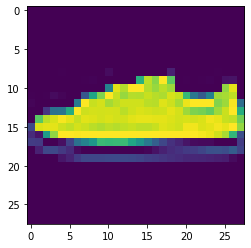

In [9]:
image = x_train[50,:].reshape((28,28))
plt.imshow(image)
plt.show()

As you can observe above the shape of shoe from the sample image



# Convolutional Neural Networks (CNN)

### Defining the shape of the image before we define the model.

In [10]:
image_rows = 28
image_cols = 28
batch_size = 512
image_shape = (image_rows,image_cols,1) # Defined the shape of the image as 3d with rows and columns and 1 for the 3d visualisation


### Formating the x_train,x_test and x_validate sets.

In [11]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)


### Visualizing the shape of x_train,x_test and x_validate

In [12]:
print("x_train shape = {}".format(x_train.shape))
print("x_test shape = {}".format(x_test.shape))
print("x_validate shape = {}".format(x_validate.shape))

x_train shape = (48000, 28, 28, 1)
x_test shape = (10000, 28, 28, 1)
x_validate shape = (12000, 28, 28, 1)


## Defining the model

In [13]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

## Compiling the model

In [14]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

### Specifying callbacks for tensorboard so that we can log some data to a file and look at it using the tensorboard

In [15]:
tensorboard = TensorBoard(
  log_dir = r'logs\{}'.format('cnn_1layer'),
  write_graph = True,
  write_grads = True,
  histogram_freq=1,
  write_images = True
)

## Training the model

In [16]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=50,
    verbose=1,
    validation_data=(x_validate,y_validate),
    callbacks = [tensorboard]
)

Epoch 1/50
94/94 [==============================] - 1s 10ms/step - loss: 0.7824 - accuracy: 0.7385 - val_loss: 0.5029 - val_accuracy: 0.8221
Epoch 2/50
94/94 [==============================] - 1s 6ms/step - loss: 0.4558 - accuracy: 0.8420 - val_loss: 0.4292 - val_accuracy: 0.8457
Epoch 3/50
94/94 [==============================] - 1s 6ms/step - loss: 0.4024 - accuracy: 0.8592 - val_loss: 0.3933 - val_accuracy: 0.8619
Epoch 4/50
94/94 [==============================] - 1s 6ms/step - loss: 0.3725 - accuracy: 0.8705 - val_loss: 0.3606 - val_accuracy: 0.8754
Epoch 5/50
94/94 [==============================] - 1s 6ms/step - loss: 0.3491 - accuracy: 0.8781 - val_loss: 0.3395 - val_accuracy: 0.8829
Epoch 6/50
94/94 [==============================] - 1s 7ms/step - loss: 0.3352 - accuracy: 0.8832 - val_loss: 0.3320 - val_accuracy: 0.8836
Epoch 7/50
94/94 [==============================] - 1s 11ms/step - loss: 0.3169 - accuracy: 0.8902 - val_loss: 0.3248 - val_accuracy: 0.8848
Epoch 8/50
94/94 [

### Evaluating the model

In [17]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))


Test Loss : 0.2473
Test Accuracy : 0.9186


## Result

#### Plotting training and validation accuracy as well as loss.

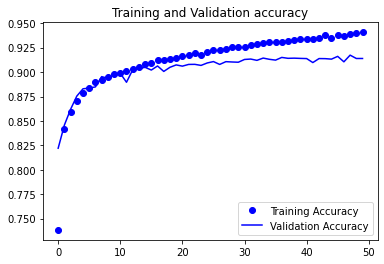

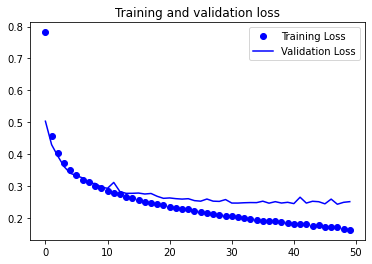

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Classification Report

### We can summarize the performance of our classifier as follows

In [19]:
def classification_report(X_test,test):
    #get the predictions for the test data
    predicted_classes = cnn_model.predict_classes(X_test)

    #get the indices to be plotted
    y_true = test.iloc[:, 0]
    correct = np.nonzero(predicted_classes==y_true)[0]
    incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [20]:
num_classes =10
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

NameError: name 'y_true' is not defined

It's apparent that our classifier is underperforming for class 6 in terms of both precision and recall. For class 2, classifier is slightly lacking precision whereas it is slightly lacking recall (i.e. missed) for class 4.



In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

# Precision and Recall


### Subset of correctly predicted classes.

In [ ]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

### Subset of incorrectly predicted classes.

Here is a subset of correctly predicted classes.

In [ ]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

It looks like diversity of the similar patterns present on multiple classes effect the performance of the classifier although CNN is a robust architechture. A jacket, a shirt, and a long-sleeve blouse has similar patterns: long sleeves (or not!), buttons (or not!), and so on.

### <span style="color:blue">**Please Upvote If You Like, Use Or Learn From This.**

### <span style="color:blue">**Also Comment For Improvisation Of The Notebook.**

### <span style="color:blue">**Thank You!!!**

